In [18]:
import random
import numpy as np

class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            # computes the activation of the next layer
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), len(test_data)))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # computation of the gradient, summed over samples
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        # update step
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [16]:
import pickle
import gzip
import numpy as np

def load_data(path=None):
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    """
    if path is None:
        path = './data/mnist.pkl.gz'
    with gzip.open(path, 'rb') as f:
        training_data, validation_data, test_data = pickle.load(f, encoding='bytes')
    return (training_data, validation_data, test_data)

def load_data_wrapper(path=None):
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    """
    tr_d, va_d, te_d = load_data(path)
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [17]:
training_data, validation_data, test_data = load_data_wrapper('neural-networks-and-deep-learning/data/mnist.pkl.gz')

In [21]:
net = Network([784, 30, 10])

In [22]:
%%time
net.SGD(training_data, 30, 10, 3.0, test_data=test_data )

Epoch 0: 9084 / 10000
Epoch 1: 9273 / 10000
Epoch 2: 9366 / 10000
Epoch 3: 9390 / 10000
Epoch 4: 9367 / 10000
Epoch 5: 9419 / 10000
Epoch 6: 9442 / 10000
Epoch 7: 9444 / 10000
Epoch 8: 9437 / 10000
Epoch 9: 9456 / 10000
Epoch 10: 9470 / 10000
Epoch 11: 9484 / 10000
Epoch 12: 9467 / 10000
Epoch 13: 9484 / 10000
Epoch 14: 9483 / 10000
Epoch 15: 9409 / 10000
Epoch 16: 9487 / 10000
Epoch 17: 9468 / 10000
Epoch 18: 9514 / 10000
Epoch 19: 9501 / 10000
Epoch 20: 9514 / 10000
Epoch 21: 9513 / 10000
Epoch 22: 9483 / 10000
Epoch 23: 9501 / 10000
Epoch 24: 9488 / 10000
Epoch 25: 9513 / 10000
Epoch 26: 9491 / 10000
Epoch 27: 9526 / 10000
Epoch 28: 9495 / 10000
Epoch 29: 9514 / 10000
CPU times: user 4min 26s, sys: 2.6 s, total: 4min 28s
Wall time: 4min 28s


In [25]:
net.weights[1]

array([[-3.95686856, -5.13926155,  0.21301742, -4.36835137, -1.63775461,
        -0.27143186, -3.98587543, -5.65880897,  0.8192211 , -4.06620808,
         3.48587907,  3.36157552,  0.91130535,  2.97880063,  2.13548814,
        -0.92985811, -1.63236895, -1.010599  , -5.10041035,  3.43950529,
        -3.6708558 ,  1.50201692, -4.92119147,  1.22224998, -2.22827498,
        -4.95791791,  3.69190995, -6.08567232,  0.27082904,  0.99250106],
       [-0.29681265, -0.15629007,  4.262394  , -3.3329144 , -3.45529609,
        -0.00975446,  1.1364299 , -5.68056897, -1.60538715, -4.41732182,
         3.14147803,  0.01548746,  4.03083388, -6.95184216,  3.78052776,
        -5.2746726 ,  2.08024456, -2.44843764,  3.13315504,  2.2879429 ,
         3.98680073, -1.74497067,  2.36575591, -1.71231419, -1.0119916 ,
        -3.85025816, -0.51302026,  1.2640674 ,  1.42546534, -1.79184247],
       [ 0.05545381, -4.9716536 ,  2.98785458,  1.28355354, -0.88104927,
         3.91189074, -1.20352487, -4.97114865, -0

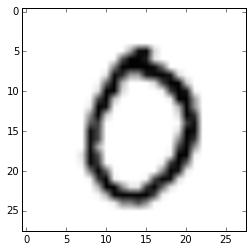

In [41]:
import matplotlib.pyplot as plt
imshow(np.reshape(training_data[0][0], [28, 28]), cmap='Greys')